In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False
        
path = '../dataset/'

## 파일불러오기

In [3]:
# excel 파일로 불러오기
# 해당 데이터의 값은 연도별 범죄율로 '건수/10만명'의 단위로 구성되어 있습니다.
# 출처 : http://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxSearch.do?idx_cd=4057
data = pd.read_excel(f'{path}stat_405701.xlsx')
data

,Unnamed: 0,Unnamed: 1,1976,1977,1978,1979,1980,1981,1982,1983,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전체 형법범죄,NaN,723.0,731.0,735.0,720.0,800.0,935.0,758.0,716.0,...,"1,830","2,014","1,895","1,997","2,069","2,098","2,003","2,054","1,962","1,864"
1,주요 형법범죄,살인,1.6,1.4,1.3,1.2,1.4,1.6,1.4,1.3,...,2.3,2.8,2.5,2.4,2.0,1.9,1.8,1.9,1.8,1.7
2,NaN,강도,3.8,3.3,2.8,3.5,6.2,6.5,5.8,6.3,...,9.8,12.9,8.9,8.1,5.3,4.0,3.2,2.9,2.3,1.9
3,NaN,성폭력(강간 포함),8.6,8.9,8.7,9.6,10.4,11.8,13.5,13.1,...,30.8,32.8,40.2,44.1,42.5,53.4,58.8,60.9,57.3,63.8
4,NaN,폭행,34.1,34.8,31.7,29.3,29.7,33.9,30.3,26.5,...,220.1,234.3,221.1,246.9,255.2,250.9,288.9,316.8,335.8,321.7
5,NaN,절도,265.7,249.1,235.8,219.7,254.5,269.1,288.2,292.3,...,455.1,520.6,540.8,563.8,583.8,576.7,525.7,483.0,397.2,358.3


In [4]:
# 에초에 데이터의 열과 행이 일반적으로 분석하던 프레임과 다르게 역전되었기 때문에 이를 해결한다

data = data.drop(columns={'Unnamed: 0','Unnamed: 1'}).transpose()
data.columns = ['전체형법범죄', '살인', '강도', '성폭력', '폭행', '절도']
data

,전체형법범죄,살인,강도,성폭력,폭행,절도
1976,723.0,1.6,3.8,8.6,34.1,265.7
1977,731.0,1.4,3.3,8.9,34.8,249.1
1978,735.0,1.3,2.8,8.7,31.7,235.8
1979,720.0,1.2,3.5,9.6,29.3,219.7
1980,800.0,1.4,6.2,10.4,29.7,254.5
1981,935.0,1.6,6.5,11.8,33.9,269.1
1982,758.0,1.4,5.8,13.5,30.3,288.2
1983,716.0,1.3,6.3,13.1,26.5,292.3
1984,700.0,1.4,7.0,13.6,24.0,265.8
1985,666.0,1.5,7.7,13.4,20.1,252.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1976 to 2017
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전체형법범죄  42 non-null     object
 1   살인      42 non-null     object
 2   강도      42 non-null     object
 3   성폭력     42 non-null     object
 4   폭행      42 non-null     object
 5   절도      42 non-null     object
dtypes: object(6)
memory usage: 2.3+ KB


## 1. 다중회귀분석

In [6]:
# 데이터가 object이므로 선형회귀를 하기에 적합하지 않음
# 따라서 데이터의 타입을 변경해줘야 함 
# 타입 변경에 앞서 object에서 string으로 변환 후 comma (,)를 제거함
data["전체형법범죄"] = data["전체형법범죄"].astype(str)
data["전체형법범죄"] = [x.replace(',','') for x in data["전체형법범죄"]]

data = data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1976 to 2017
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전체형법범죄  42 non-null     float64
 1   살인      42 non-null     float64
 2   강도      42 non-null     float64
 3   성폭력     42 non-null     float64
 4   폭행      42 non-null     float64
 5   절도      42 non-null     float64
dtypes: float64(6)
memory usage: 2.3+ KB


In [7]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = data['전체형법범죄']
feature = data.drop(columns='전체형법범죄')

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [8]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 전체형법범죄   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     73.91
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           6.52e-18
Time:                        14:18:34   Log-Likelihood:                -275.05
No. Observations:                  42   AIC:                             562.1
Df Residuals:                      36   BIC:                             572.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -462.9459    175.646     -2.636      0.0

### 1-1 다중공선성 측정

In [9]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature)

,VIF Factor,features
0,45.961468,살인
1,29.467734,성폭력
2,24.333248,강도
3,18.223852,폭행
4,13.094794,절도


In [10]:
# 다중공선성 측정
def vif_drop(x, cut_off):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = cut_off
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a] : .4f}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {vif[q] : .2f}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

vif(feature)

,VIF Factor,features
0,45.961468,살인
1,29.467734,성폭력
2,24.333248,강도
3,18.223852,폭행
4,13.094794,절도


In [11]:
import statsmodels.api as sm

# 다중공선성 제거후 모델 형성

feature = data[{'강도', '폭행'}]

# sm OLS 적합
feature_add = sm.add_constant(feature, has_constant='add')

model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 전체형법범죄   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.81e-17
Time:                        14:18:34   Log-Likelihood:                -284.39
No. Observations:                  42   AIC:                             574.8
Df Residuals:                      39   BIC:                             580.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.1744    104.958      1.640      0.1

## 2. 회귀 식의 적합성 검정 : 잔차분석

### 정규성, 자기상관성, 등분산성 검정

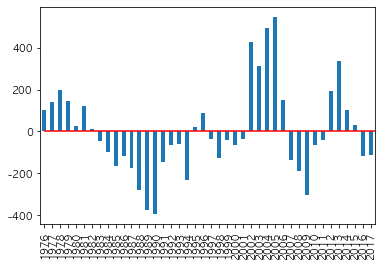

In [12]:
# 잔차 시각화
fitted_model.resid.plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=42, colors='red') #잔차는 0을 기준으로 생성되기 때문에 y=0의 선을 그어준다. (기준선 역할)
plt.show()

### 2-1 오차항의 등분산성

In [13]:
# yhat은 model 형성을 하면서 feature를 넣고 도출된 회귀값들임
yhat = fitted_model.fittedvalues
subset = pd.concat([yhat, target, fitted_model.resid], axis=1)
subset.columns = ['yhat', 'target', 'model_residual']

# 따라서 yhat, 전체형법범죄 데이터의 차이는 잔차 값으로 남아있음. (컬럼 자체를 연산하지 않았지만, 연산 결과는 잔차와 동일함)
# subset

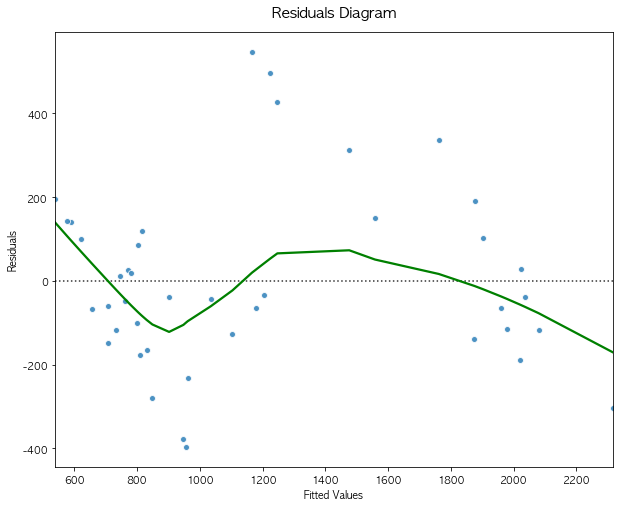

In [14]:
# 오차항의 등분산성을 확인하기 위한 플롯 형성
fig = plt.figure(figsize= (10,8))

# yhat값의 변화에 따라 오차항이 어떻게 변화하는지 육안으로 확인하는 부분 (등분산성은 yhat값과 무관하게 일정한 분산을 유지하는 형태로 도출됨)
sns.residplot(x = "yhat", y = "target", 
              data = subset, scatter_kws = {'edgecolor':"white"},
              lowess = True, line_kws = {"color":"green"})
plt.title("Residuals Diagram", fontsize=15, y=1.02)
plt.xlabel("Fitted Values")  
plt.ylabel("Residuals")
plt.show()

In [15]:
# 하나씩 시행해보기
from statsmodels.compat import lzip
import statsmodels.stats.api as sm

#perform Bresuch-Pagan test
names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
test = sm.het_breuschpagan(fitted_model.resid, fitted_model.model.exog)

# 독립변수, featue의 values (endog는 y값)
# fitted_model.model.exog

for i in lzip(names, test):
    print(f'{i[0]} : {i[1] : .3f}')
# which assumes independent and identically distributed
# error terms, or the original Breusch-Pagan version which assumes
# residuals are normally distributed.

# The null hypothesis (H0): Homoscedasticity is present.

Lag_range multiplier statistic :  7.937
p-value :  0.019
f-value :  4.544
f p-value :  0.017


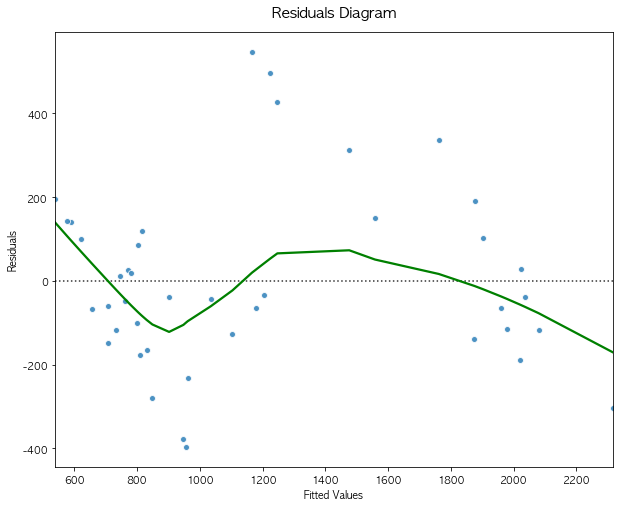

Lag_range multiplier statistic :  7.937
p-value :  0.019
f-value :  4.544
f p-value :  0.017
오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 5.0%에서 기각합니다.
오차항이 이분산(Heteroscedasticity)을 따르므로 선형회귀 모형의 가정에 어긋납니다.


In [30]:
def bp_test(fitted_model, sig_level):
    # 라이브러리 호출
    from statsmodels.compat import lzip
    from statsmodels.stats.api import het_breuschpagan
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # 변수설정
    yhat = fitted_model.fittedvalues
    subset = pd.concat([yhat, target], axis=1)
    subset.columns = ['yhat', 'target']
    names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
    test = het_breuschpagan(fitted_model.resid, fitted_model.model.exog)
    
    # 오차항의 등분산성을 확인하기 위한 플롯 형성
    fig = plt.figure(figsize= (10,8))
    sns.residplot(x = "yhat", y = "target", 
                data = subset, scatter_kws = {'edgecolor':"white"},
                lowess = True, line_kws = {"color":"green"})
    plt.title("Residuals Diagram", fontsize=15, y=1.02)
    plt.xlabel("Fitted Values")  
    plt.ylabel("Residuals")
    plt.show()

    for i in lzip(names, test):
        print(f'{i[0]} : {i[1] : .3f}')
        
    if test[1] > sig_level:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        print(f'오차항이 이분산(Heteroscedasticity)을 따르므로 선형회귀 모형의 가정에 어긋납니다.')

bp_test(fitted_model, 0.05)

In [17]:
# 이분산 검정 추가 (white test)
from statsmodels.stats.api import het_white

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

white_test = het_white(fitted_model.resid, fitted_model.model.exog)

print(dict(zip(labels, white_test)))

# Null (H0): Homoscedasticity is present (residuals are equally scattered)
# Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

{'Test Statistic': 11.063325471286792, 'Test Statistic p-value': 0.05013878195636732, 'F-Statistic': 2.574806264950487, 'F-Test p-value': 0.04322060745922974}


### 2-2 오차항의 독립성

In [18]:
# 한줄씩 해보기
# 더빈왓슨 통계 (DW-test)
# 오차항의 독립성 검정으로 귀무가설은 '오차항이 독립적이다.'이다.
# statsmodel에서 도출한 OLS summary에서도 DW 값이 나오는데 2에 인접하는 경우, 오차항의 상관관계가 없는 것으로 나온다.
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids=fitted_model.resid)

0.5379350593001653

In [19]:
# 한줄씩 해보기
# 잔차 정의
resids=fitted_model.resid
# DW 통계치를 구하는 공식 적용 (시차 1 적용)
diff_resids = np.diff(resids, 1, axis=0)
dw = np.sum(diff_resids**2, axis=0) / np.sum(resids**2, axis=0)
# dw 통계치 도출 완료
dw

0.5379350593001653

#### DW 검정에 대한 설명
The test statistic is approximately equal to 2*(1-r) where ``r`` is the
sample autocorrelation of the residuals. Thus, for r == 0, indicating no
serial correlation, the test statistic equals 2. This statistic will
always be between 0 and 4. The closer to 0 the statistic, the more
evidence for positive serial correlation. The closer to 4, the more
evidence for negative serial correlation.

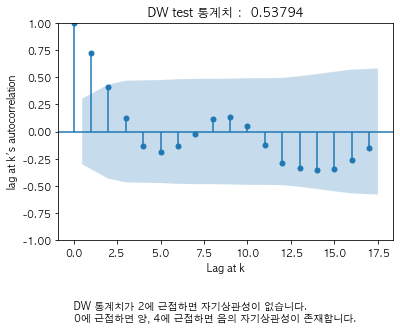

In [20]:
def autocorr_resid(fitted_model):
    from statsmodels.graphics.tsaplots import plot_acf
    import matplotlib.pyplot as plt
    from statsmodels.stats.stattools import durbin_watson

    # 오차항의 자기상관성 검정
    plot_acf(fitted_model.resid)
    plt.xlabel('Lag at k')
    plt.ylabel("lag at k's autocorrelation")
    plt.title(f'DW test 통계치 : {durbin_watson(resids=fitted_model.resid) : .5f}')
    plt.text(y=-1.75,x=0, s='DW 통계치가 2에 근접하면 자기상관성이 없습니다.\n0에 근접하면 양, 4에 근접하면 음의 자기상관성이 존재합니다.')
    plt.show()

autocorr_resid(fitted_model)   

### 2-3. 오차항의 정규성

In [21]:
# 정규성 검정 (귀무가설 : 정규성를 따른다)
from scipy.stats import jarque_bera

statistic, pvalue = jarque_bera(fitted_model.resid)
print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')

검정통계치 :  3.02627
p값 :  0.22022


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


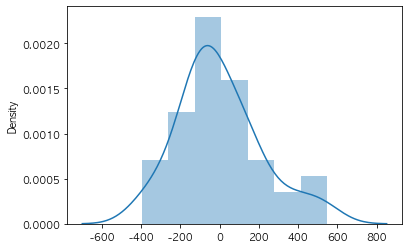

In [22]:
# 오차항 시각화
sns.distplot(fitted_model.resid)
plt.show()

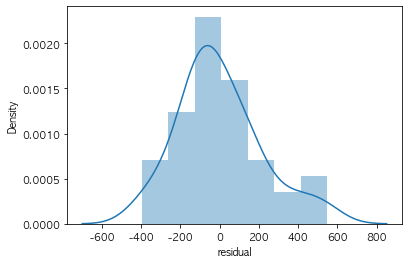

검정통계치 :  3.02627
p값 :  0.22022
오차항이 정규분포를 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [23]:
def normal_test(fitted_model, sig_level):
    # 정규성 검정 (귀무가설 : 정규성를 따른다)
    from scipy.stats import jarque_bera
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    sns.distplot(fitted_model.resid)
    plt.xlabel('residual')
    plt.show()
    
    statistic, pvalue = jarque_bera(fitted_model.resid)
    print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')
    if pvalue > sig_level:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        
normal_test(fitted_model, .05)


## 3. 변수선택법

### 3-1. 전진선택법

In [24]:
# 하나씩 해보기
## 전진 단계별 선택법

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 변수 설정
target = data['전체형법범죄']
feature = data.drop(columns='전체형법범죄')
variables = feature.columns.tolist() 
y = target

# 선택된 변수들 list 생성
forward_valriables = []

# 전진선택시 P 값을 고려할 때, 선택과 제거 임계치 설정    
sl_enter = 0.05
sl_remove = 0.05

# 각 스텝별로 선택된 변수들
sv_per_step = [] 
# 각 스텝별 수정된 결정계수
adj_r_squared_list = []
# 스텝
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(forward_valriables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = feature[forward_valriables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit(disp=0)
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        forward_valriables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(forward_valriables) > 0:
            selected_X = feature[forward_valriables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                forward_valriables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(feature[forward_valriables])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(forward_valriables.copy())
    else:
        break

In [25]:
# 최종 모형 도출
X = sm.add_constant(data[forward_valriables])
model = sm.OLS(y, X).fit(disp=0)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 전체형법범죄   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           6.68e-21
Time:                        14:18:40   Log-Likelihood:                -275.88
No. Observations:                  42   AIC:                             557.8
Df Residuals:                      39   BIC:                             563.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -544.7890    131.527     -4.142      0.0

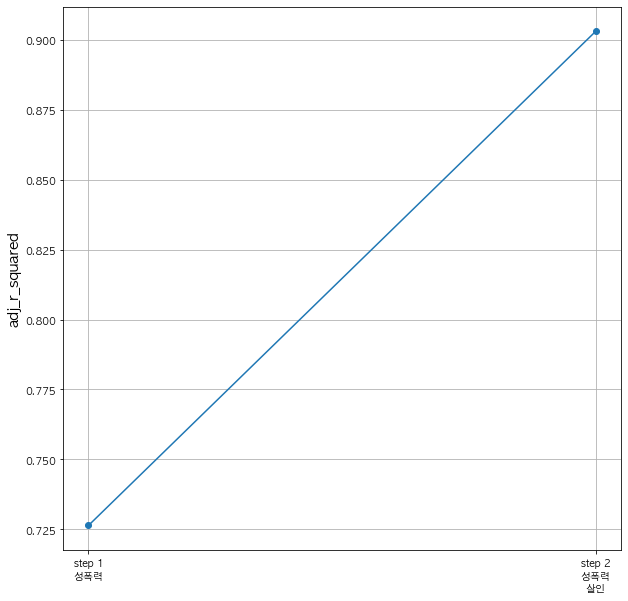

In [26]:
# 스텝별로 조정된 결정계수를 출력하는 표 시각화
fig = plt.figure(figsize=(10,10))
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
plt.plot(steps, adj_r_squared_list, marker='o')
plt.ylabel('adj_r_squared',fontsize=15)
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 전체형법범죄   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           6.68e-21
Time:                        14:18:40   Log-Likelihood:                -275.88
No. Observations:                  42   AIC:                             557.8
Df Residuals:                      39   BIC:                             563.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -544.7890    131.527     -4.142      0.0

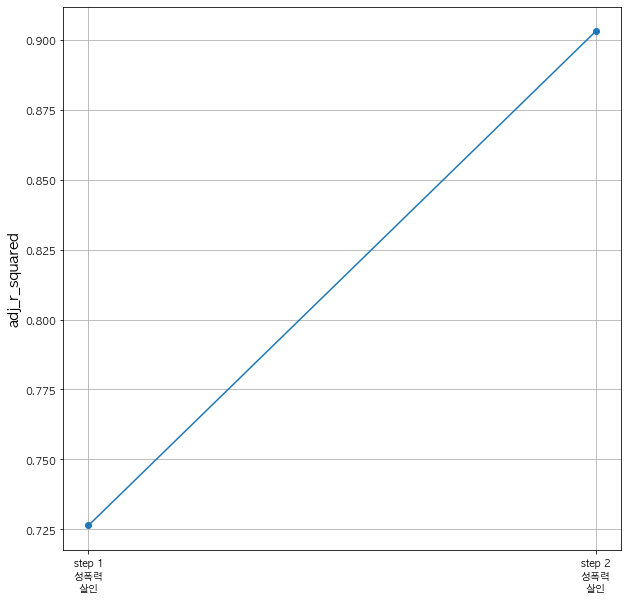

In [27]:
def forward_feature_selection(feature, target, sl_enter=.05, sl_remove=.05):
    ## 전진 단계별 선택법

    import statsmodels.api as sm
    import pandas as pd
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    # 변수 설정
    variables = feature.columns.tolist() 
    # 선택된 변수들 list 생성
    forward_valriables = []
    # 각 스텝별로 선택된 변수들
    sv_per_step = [] 
    # 각 스텝별 수정된 결정계수
    adj_r_squared_list = []
    # 스텝
    steps = []
    step = 0

    while len(variables) > 0:
        remainder = list(set(variables) - set(forward_valriables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[forward_valriables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(target,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            forward_valriables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(forward_valriables) > 0:
                selected_X = feature[forward_valriables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(target,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    forward_valriables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(target,sm.add_constant(feature[forward_valriables])).fit(disp=0).rsquared_adj
            adj_r_squared_list.append(adj_r_squared)
            sv_per_step.append(forward_valriables)
        else:
            break

    # 최종 모형 도출
    model = sm.OLS(target, sm.add_constant(data[forward_valriables])).fit(disp=0)
    print(model.summary())

    # 스텝별로 조정된 결정계수를 출력하는 표 시각화
    fig = plt.figure(figsize=(10,10))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()
    
    return model
    
forward_model = forward_feature_selection(feature, target)

### 3-2 후진제거법

                            OLS Regression Results                            
Dep. Variable:                 전체형법범죄   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           6.68e-21
Time:                        14:18:41   Log-Likelihood:                -275.88
No. Observations:                  42   AIC:                             557.8
Df Residuals:                      39   BIC:                             563.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -544.7890    131.527     -4.142      0.0

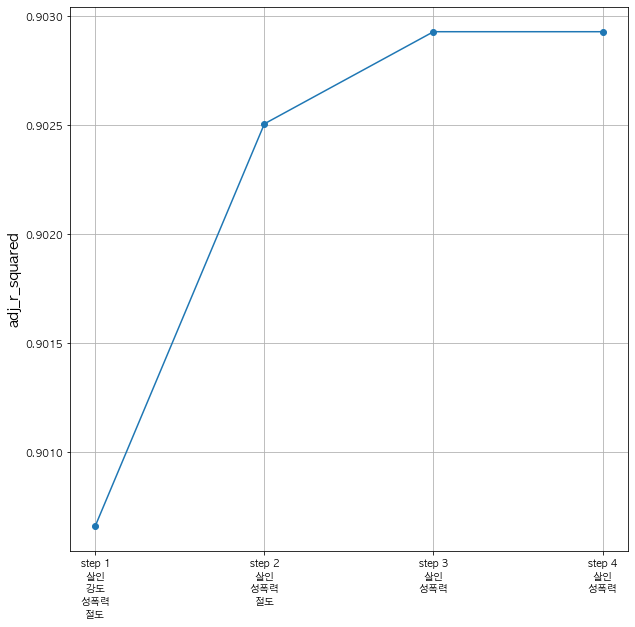

In [28]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())

    
    fig = plt.figure(figsize=(10,10))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

backward_model = backward_regression(feature, target)

### 3-3 단계적 선택법

                            OLS Regression Results                            
Dep. Variable:                 전체형법범죄   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           6.68e-21
Time:                        14:18:41   Log-Likelihood:                -275.88
No. Observations:                  42   AIC:                             557.8
Df Residuals:                      39   BIC:                             563.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -544.7890    131.527     -4.142      0.0

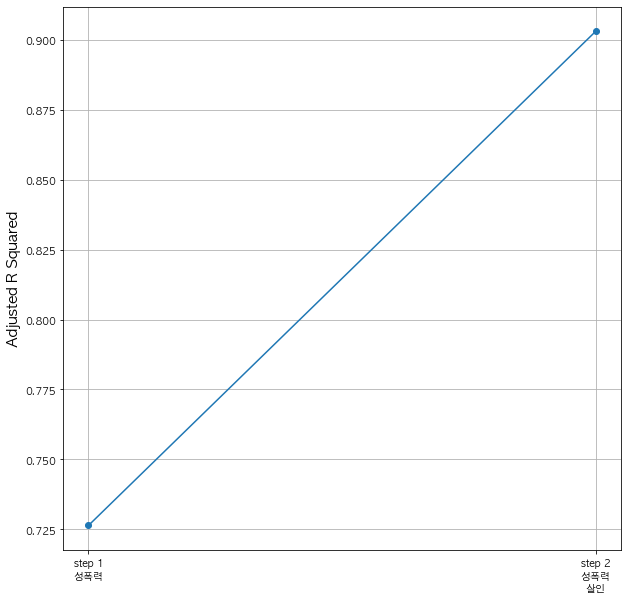

In [29]:
def stepwise_feature_selection(feature, target, variables=feature.columns.tolist()):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(feature[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    
    model = sm.OLS(y, sm.add_constant(feature[selected_variables])).fit()
    print(model.summary())
    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    plt.plot(steps,adjusted_r_squared, marker='o')
    plt.ylabel('Adjusted R Squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

stepwise_model = stepwise_feature_selection(feature, target)